This file is part of the LLM4AD project (https://github.com/Optima-CityU/llm4ad).

EoH Reference:
> Fei Liu, Tong Xialiang, Mingxuan Yuan, Xi Lin, Fu Luo, Zhenkun Wang, Zhichao Lu, and Qingfu Zhang. "Evolution of Heuristics: Towards Efficient Automatic Algorithm Design Using Large Language Model." In Forty-first International Conference on Machine Learning (ICML). 2024.

Copyright (c) 2025 Optima Group.

Permission is granted to use the LLM4AD platform for research purposes. All publications, software, or other works that utilize this platform or any part of its codebase must acknowledge the use of "LLM4AD" and cite the following reference:

> Fei Liu, Rui Zhang, Zhuoliang Xie, Rui Sun, Kai Li, Xi Lin, Zhenkun Wang, Zhichao Lu, and Qingfu Zhang, "LLM4AD: A Platform for Algorithm Design with Large Language Model," arXiv preprint arXiv:2412.17287 (2024).

For inquiries regarding commercial use or licensing, please contact http://www.llm4ad.com/contact.html.

# Circle Packing Problem Using EoH
## Packing circles inside a unit square to maximize sum of radii

Given a positive integer $n$, the problem is to pack $n$ disjoint circles inside a unit square so as to maximize the sum of their radii. The state of the arts for $n=26$ are listed below.

- Best-known (until April 2025) was 2.634 [1]
- AlphaEvolve (Google, May 2025) achieved 2.6358627 [2]
- Our EoH improves it to 2.635**9372** [3]

[1]. E. Friedman. Erich’s Packing Center. https://erichfriedman.github.io/packing/, 2025.

[2]. Novikov, Alexander, et al. "AlphaEvolve: A coding agent for scientific and algorithmic discovery." Google DeepMind, 2025.

[3]. EoH implemented in LLM4AD platform https://github.com/Optima-CityU/llm4ad.

## 1. The solution found by EoH

In [1]:
import numpy as np

circles_n26_EoH = np.array([
    [0.111084305993749, 0.888915776084995, 0.11108422391500],
    [0.868462155407797, 0.295733224061302, 0.13153768306754],
    [0.727783222943520, 0.498380061573974, 0.11515301939804],
    [0.403111300872117, 0.272541728183514, 0.10029219641849],
    [0.110930560468470, 0.110930558595145, 0.11093055859462],
    [0.257534125335165, 0.403906875708988, 0.09579328492736],
    [0.867354719104342, 0.703132415577786, 0.13264473888523],
    [0.915331563642941, 0.084668436310979, 0.08466843631023],
    [0.616606296048774, 0.297281597488369, 0.11463144771971],
    [0.726268604848579, 0.894716609217023, 0.10528339078297],
    [0.468640991728957, 0.499519530353827, 0.13595568835904],
    [0.317827165529155, 0.903869164549508, 0.09613083544881],
    [0.236870690235288, 0.759490724499475, 0.06939585376249],
    [0.921467626335991, 0.499006067187007, 0.07853237358195],
    [0.257659453004759, 0.595553920525604, 0.09585380086544],
    [0.517405430337972, 0.896413384746041, 0.10358661523956],
    [0.092515185172475, 0.686164929803147, 0.09251518157548],
    [0.317467088318936, 0.095961492987491, 0.09596149298521],
    [0.725994502631395, 0.105849717739049, 0.10584971773723],
    [0.236626180204339, 0.240123133966032, 0.06931957413854],
    [0.618473895679963, 0.701760368551477, 0.11574106517838],
    [0.093876984538892, 0.499777741685158, 0.09387698132345],
    [0.516723608777517, 0.103435095835915, 0.10343509583591],
    [0.092443573193719, 0.313462701116682, 0.09244357312537],
    [0.403658439192799, 0.726914113343101, 0.10054172918802],
    [0.915221349556017, 0.915221349554532, 0.08477865044119]
])

## 2. Verify the solution
> The verification code is from AlphaEvolve.

In [2]:
import numpy as np
import itertools


def verify_circles(circles: np.ndarray) -> bool:
    """Checks that the circles are disjoint and lie inside a unit square.

    Args:
        circles: A numpy array of shape (num_circles, 3), where each row is
            of the form (x, y, radius), specifying a circle.

    Returns:
        bool: True if valid, False otherwise
    """
    try:
        # Check pairwise disjointness
        for circle1, circle2 in itertools.combinations(circles, 2):
            center_distance = np.sqrt((circle1[0] - circle2[0]) ** 2 + (circle1[1] - circle2[1]) ** 2)
            radii_sum = circle1[2] + circle2[2]
            if center_distance < radii_sum:
                print(center_distance, radii_sum)
                print('error')
                return False

        # Check all circles lie inside the unit square [0,1]x[0,1]
        for circle in circles:
            if not (0 <= min(circle[0], circle[1]) - circle[2] and
                    max(circle[0], circle[1]) + circle[2] <= 1):
                print('error')
                return False
        return True
    except Exception:
        return False


if verify_circles(circles_n26_EoH):
    print(f'Sum of radii from EoH = {np.sum(circles_n26_EoH[:, 2]):.7f}')


Sum of radii from EoH = 2.6359372


## 3. Visualize the solution

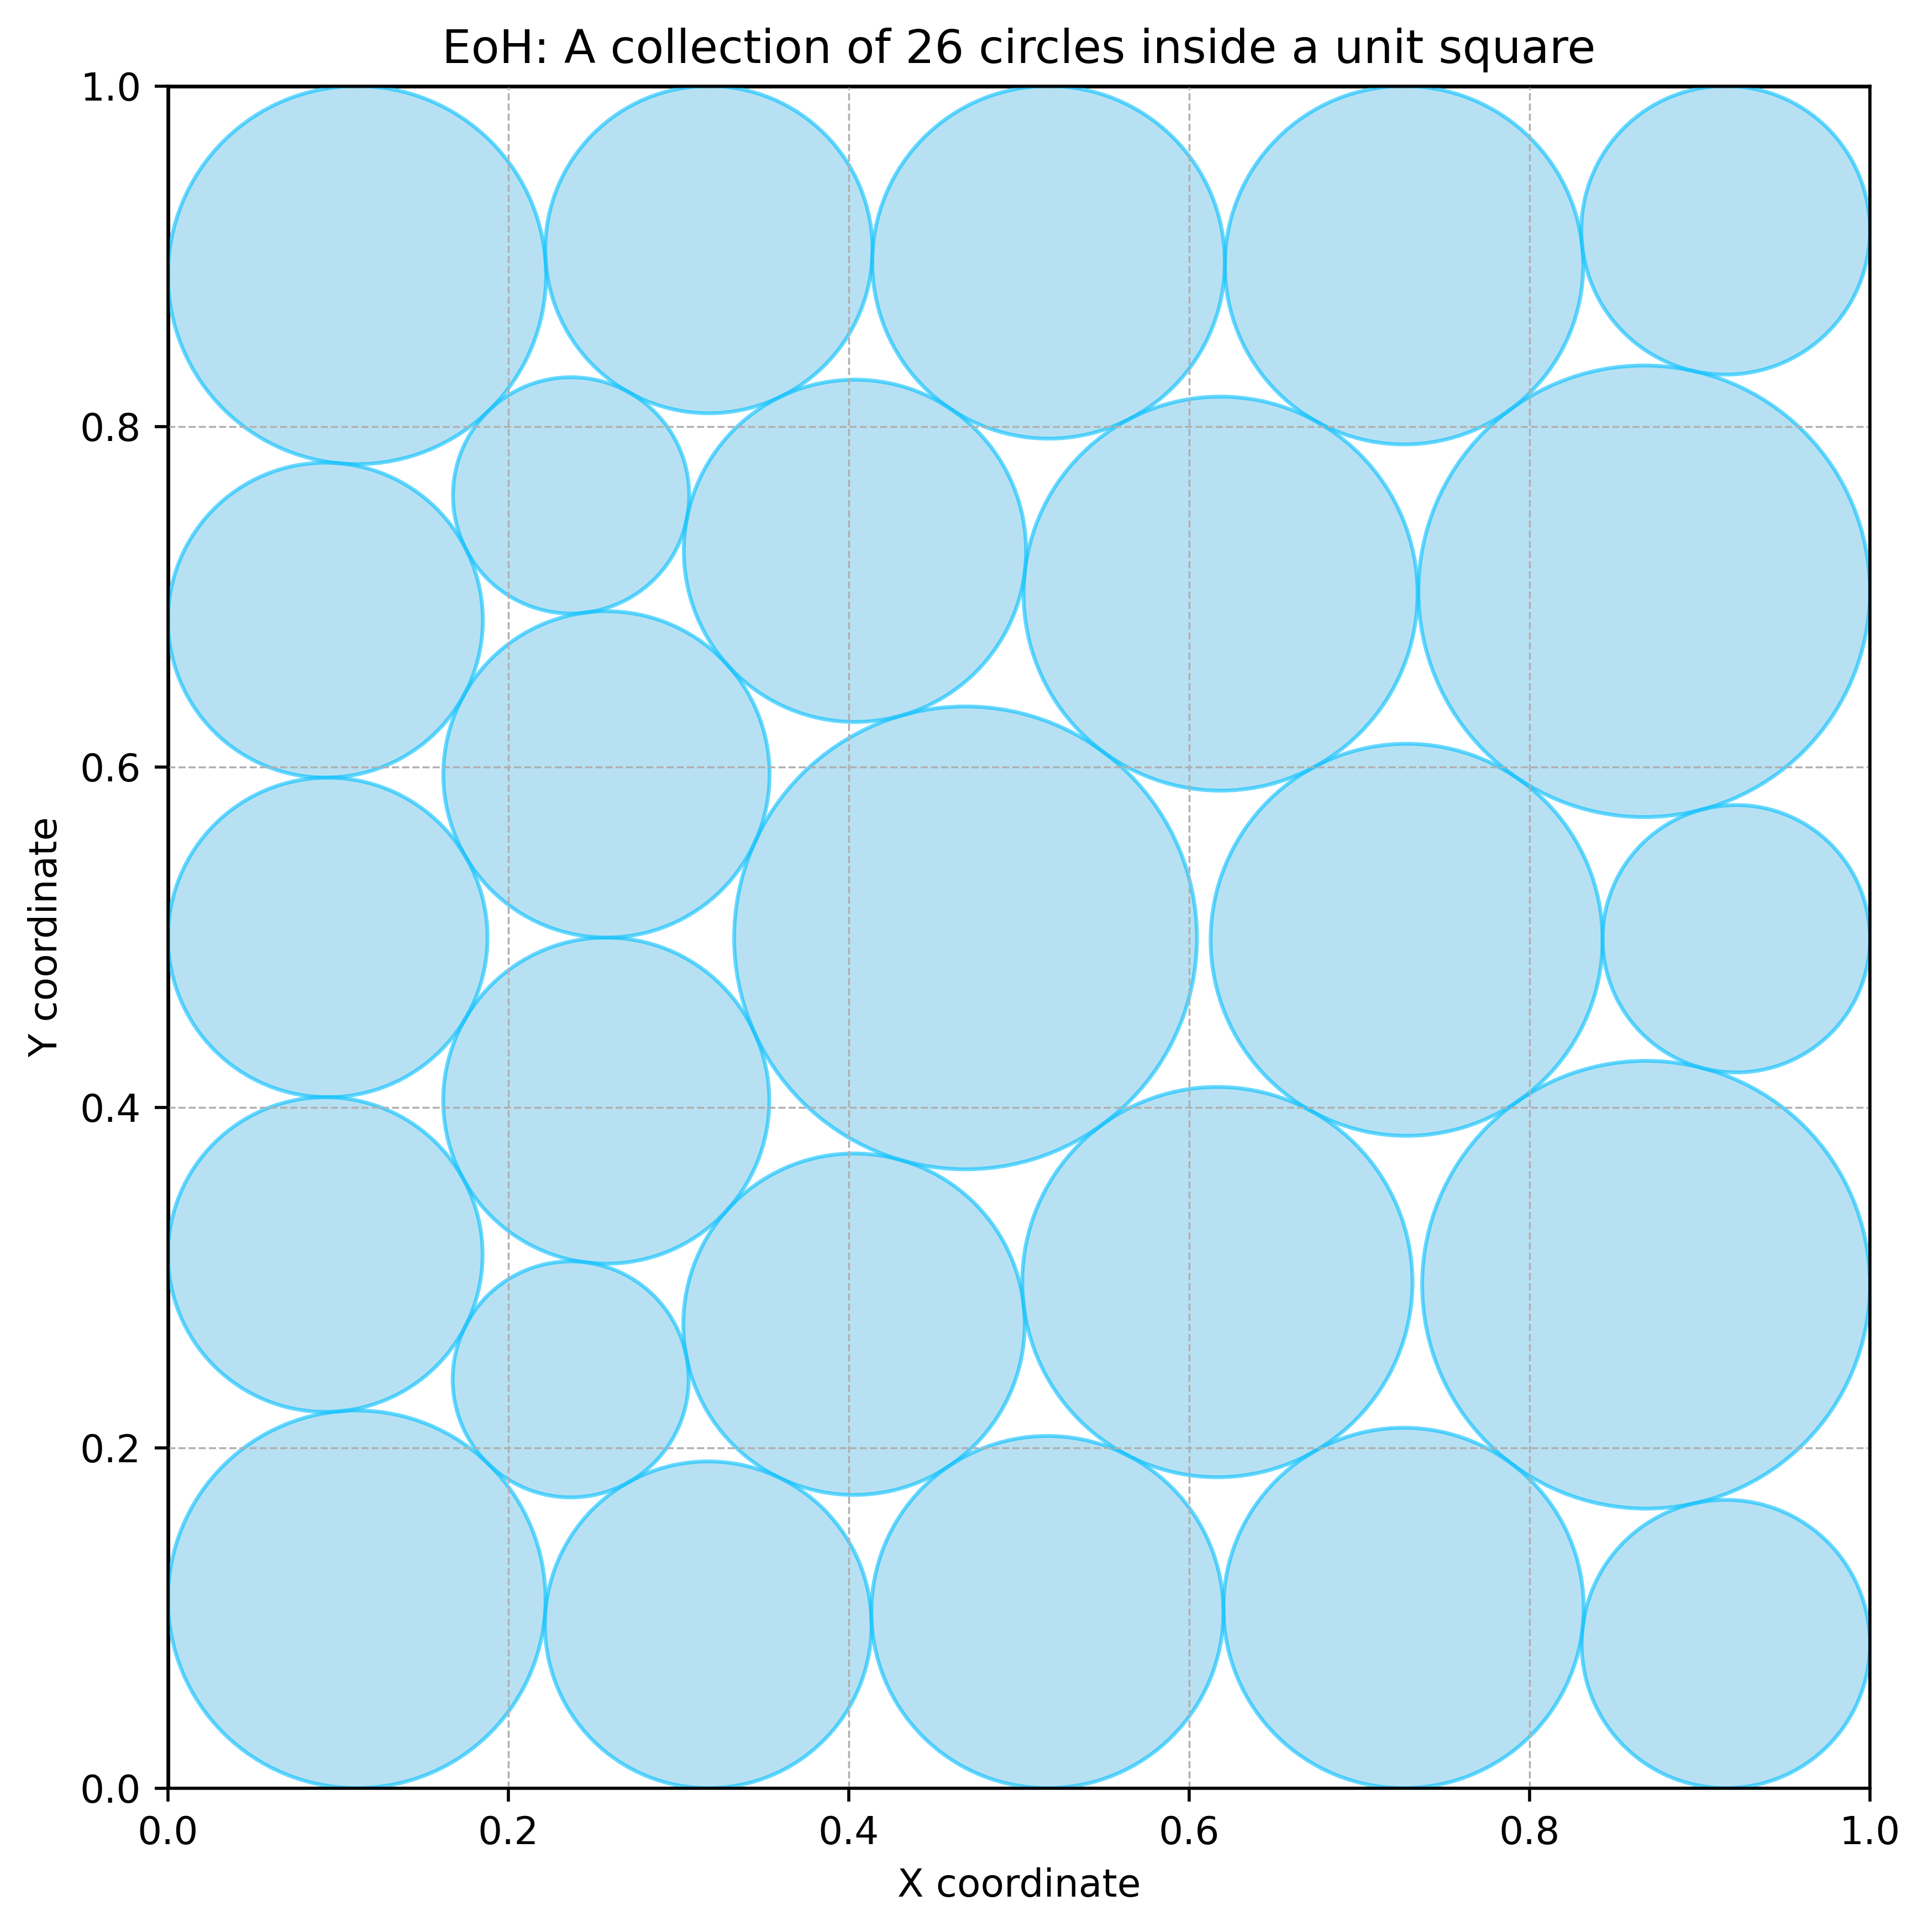

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def plot_circles(method_name, circles: np.ndarray):
    """Plots a collection of circles within a unit square.
    Args:
        circles (np.ndarray): An array of circles where each circle is represented
                              by [x_center, y_center, radius].
    """
    # Create a plot with square aspect ratio
    fig, ax = plt.subplots(figsize=(8, 8), dpi=500)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'{method_name}: A collection of {len(circles)} circles inside a unit square')

    # Draw the unit square boundary
    unit_square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(unit_square)

    # Plot each circle
    for x_center, y_center, radius in circles:
        circle_patch = patches.Circle((x_center, y_center), radius,
                                      edgecolor='deepskyblue', facecolor='skyblue', alpha=0.6)
        ax.add_patch(circle_patch)

    # Adding grid, labels, and a legend (if needed)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')

    # Display the plot
    plt.show()


plot_circles('EoH', circles_n26_EoH)

## 4. Reproduce our results
The algorithm below is automated designed by EoH.
Note: it takes about 10 minutes to run the following cell.

In [4]:
import numpy as np
from scipy.stats import qmc


def pack_circles(n: int) -> np.ndarray:
    """
    Packs n circles inside a unit square using the EoH algorithm.
    Args:
        n (int): The number of circles to pack.
    """
    np.random.seed(2025)
    # Latin Hypercube Sampling initialization
    sampler = qmc.LatinHypercube(d=2, seed=2025)
    points = sampler.random(n)
    circles = np.zeros((n, 3))
    circles[:, :2] = points
    circles[:, 2] = np.minimum(np.minimum(circles[:, 0], 1 - circles[:, 0]),
                               np.minimum(circles[:, 1], 1 - circles[:, 1])) * 0.15
    # Modified simulated annealing with cosine annealing
    for iteration in range(40000):
        temperature = 0.4 * (1 + np.cos(iteration * np.pi / 40000))
        levy_prob = 0.15 * np.exp(-iteration / 15000)
        for i in range(n):
            x, y, r = circles[i]
            # Radius expansion
            max_r = min(x, 1 - x, y, 1 - y)
            for j in range(n):
                if i == j:
                    continue
                dist = np.sqrt((circles[j, 0] - x) ** 2 + (circles[j, 1] - y) ** 2)
                max_r = min(max_r, dist - circles[j, 2])
            best_pos = None
            best_r = 0
            for _ in range(30):
                if np.random.random() < levy_prob:
                    step_size = 0.25 * temperature
                    new_x = np.clip(x + np.random.normal(0, 1) * step_size, 0, 1)
                    new_y = np.clip(y + np.random.normal(0, 1) * step_size, 0, 1)
                else:
                    step_size = 0.05 * (1 - iteration / 40000) ** 2
                    new_x = np.clip(x + np.random.uniform(-step_size, step_size), 0, 1)
                    new_y = np.clip(y + np.random.uniform(-step_size, step_size), 0, 1)
                current_r = min(new_x, 1 - new_x, new_y, 1 - new_y)
                for j in range(n):
                    if i == j:
                        continue
                    dist = np.sqrt((circles[j, 0] - new_x) ** 2 + (circles[j, 1] - new_y) ** 2)
                    current_r = min(current_r, dist - circles[j, 2])
                if current_r > best_r:
                    best_r = current_r
                    best_pos = (new_x, new_y, current_r)
            # Acceptance with Metropolis criterion
            if best_r > r or np.random.random() < np.exp((best_r - r) / max(temperature, 1e-8)):
                if best_pos is not None:
                    circles[i] = best_pos
        if iteration % 500 == 0:
            print(f"iteration={iteration}, score = {np.sum(circles[:, 2])}")
    print(f"final score = {np.sum(circles[:, 2])}")
    print("final solution =")
    np.set_printoptions(precision=15)  # Set display precision to 15 digits
    print(circles)
    return circles


circles = pack_circles(26)
if verify_circles(circles_n26_EoH):
    print(f'Sum of radii from EoH = {np.sum(circles_n26_EoH[:, 2]):.7f}')

iteration=0, score = 2.061714504122059
iteration=500, score = 2.3907334876488457
iteration=1000, score = 2.4270077225572284
iteration=1500, score = 2.4344423439630476
iteration=2000, score = 2.3915593911073985
iteration=2500, score = 2.4262256069182473
iteration=3000, score = 2.4449445349351477
iteration=3500, score = 2.4746372957105662
iteration=4000, score = 2.438068265090285
iteration=4500, score = 2.432440017675383
iteration=5000, score = 2.45619452171856
iteration=5500, score = 2.4832993367497664
iteration=6000, score = 2.4582701519032772
iteration=6500, score = 2.4778989414355665
iteration=7000, score = 2.4970434685035743
iteration=7500, score = 2.484444134730139
iteration=8000, score = 2.4842468026902824
iteration=8500, score = 2.489312588965004
iteration=9000, score = 2.494212669078025
iteration=9500, score = 2.5062123115099295
iteration=10000, score = 2.5010169094654646
iteration=10500, score = 2.5159442177893054
iteration=11000, score = 2.531286335907262
iteration=11500, scor